In [ ]:
# insurance cover analysis

# Objective
# Data Overview
# Data cleaning
# Exploratory data analysis
# key insights 
# Conclusion

# objective 

 The goal of this analysis is to find out how different factors influence the charges of medical cover

# Overview 

The dataset contains information of individuals including age,sex,bmi,children,smoker,region,charges

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [11]:
data = pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\DATA SCIENCE PROJECTS\insurance.csv")
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


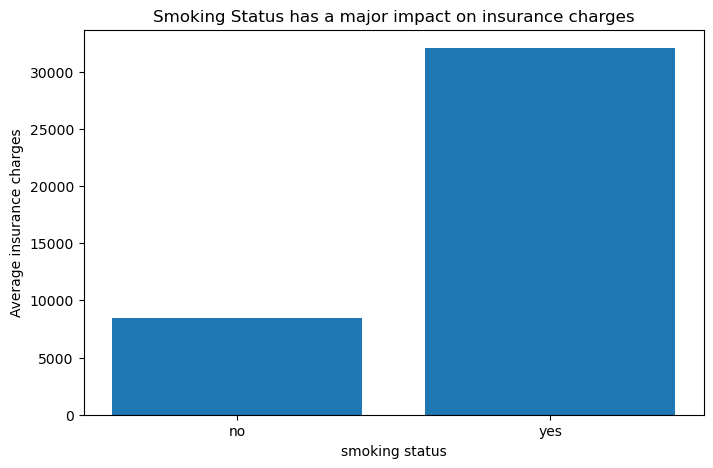

In [16]:
avg_smoker_charges = data.groupby("smoker")["charges"].mean()
plt.figure(figsize =(8,5))
plt.bar(avg_smoker_charges.index, avg_smoker_charges.values)
plt.xlabel("smoking status")
plt.ylabel("Average insurance charges")
plt.title("Smoking Status has a major impact on insurance charges")
plt.show()


       insight
 smokers have higher rate of insurance compared to non-smokers,this show that  smoking is a risk leading to high rate of insurance

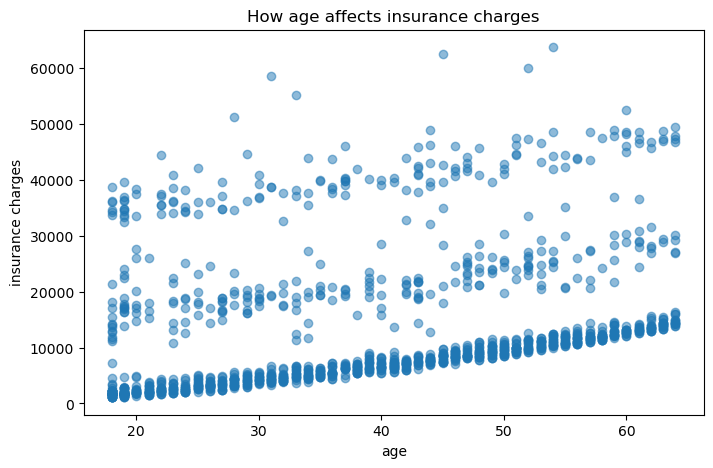

In [16]:
plt.figure(figsize =(8,5))
plt.scatter(data["age"], data["charges"],alpha= 0.5)
plt.xlabel("age")
plt.ylabel("insurance charges")
plt.title("How age affects insurance charges")
plt.show()           
           


      # insight 
insurance tend to increase with age showing that the older person has higher rate of insurance, However age alone is not a foctor due to the disttribution 

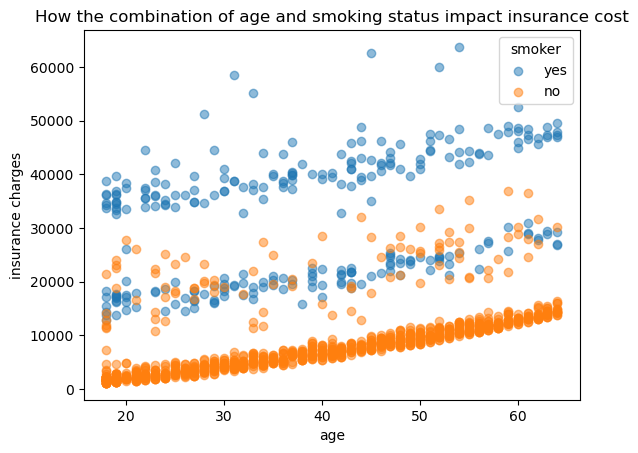

In [17]:
for status in data["smoker"].unique():
    subset = data[data["smoker"] == status ]
    plt.scatter(subset["age"], subset["charges"], label= status ,alpha= 0.5)
plt.xlabel("age")
plt.ylabel("insurance charges")
plt.title("How the combination of age and smoking status impact insurance cost")
plt.legend(title = "smoker")
plt.show()

          # insight 
 smokers insurance charges increases across the the ages but it is more severe as the age increases 

In [13]:
x = data[["age"]]
y = data["charges"]
model = LinearRegression()
model.fit(x,y)
model.coef_,model.intercept_

(array([257.72261867]), np.float64(3165.885006063021))

In [ ]:
## Regression: Age vs Charges

A simple linear regression was fitted to quantify the relationship
between age and insurance charges.

### Interpretation
The model estimates that insurance charges increase by approximately
$258 for each additional year of age on average. This confirms the
positive relationship observed in the scatter plot.


In [4]:
data["smoker_Binary"] = data["smoker"].map({"no":0 , "yes":1})
x = data[["age","smoker_Binary"]]
y = data["charges"]
model = LinearRegression()
model.fit(x,y)
model.coef_,model.intercept_

(array([  274.87118587, 23855.30481666]), np.float64(-2391.6263593585463))

           # insight
The estimated effect of age increases after including smoking status in
the model. This occurs because smoking is correlated with age and has a
large effect on insurance charges. When smoking is omitted, part of its
effect is incorrectly attributed to age. Including smoking allows the
model to isolate the independent contribution of each variable.


      # key Insights
 smoking is the most predictive  factor that affects the rate at which charges increase
 charges increase as you age but it is extreme for those who smoke as they age
 there is a steady prediction of non smokers compared to smokers


     # conclusion
In conclusion to the data analayzed above we find that smoking and age are the key factors influencing insurance cost . if this can be dealt with especially smoking as you age the medical expenses can be lower

In [8]:
import os
print("current working directory")
os.getcwd()

current working directory


'C:\\Users\\admin'